# OCI + LangChain Multimodal LLM Walkthrough
This notebook walks through `openai_oci_multimodal.py` **step by step**.

You will:
1. Prepare the environment & configuration
2. Load and inspect the image you want the model to see
3. Build the prompt payload (text + image)
4. Send it to different OCI-hosted models via LangChain
5. Compare the responses and timings


## 1  Environment setup
**Requirements** (already in the repo):

Create or edit `sandbox.yaml`  and `.env` with your OCI denv details like `profile` and `compartment`.


 - **Documentation**:  https://docs.oracle.com/en-us/iaas/Content/generative-ai/home.htm
 - **GitHub SDK**: TBD- yet not released 
 - **Slack channels** :#generative-ai-users or #igiu-innovation-lab
  
  If you have errors running sample code, reach out for help in #igiu-ai-learning


In [1]:
import os, sys, base64, time, pathlib
from dotenv import load_dotenv
from envyaml import EnvYAML

from langChain.oci_openai_helper import OCIOpenAIHelper

load_dotenv()


True

## 2  Load sandbox configuration

In [2]:
SANDBOX_CONFIG_FILE = 'sandbox.yaml'

def load_config(path):
    try:
        return EnvYAML(path)
    except FileNotFoundError:
        raise FileNotFoundError(f"❌ '{path}' not found. Create it from sandbox.yaml.template.")

cfg = load_config(SANDBOX_CONFIG_FILE)
compartment_id = cfg['oci']['compartment']
profile        = cfg['oci']['profile']
print('Profile     :', profile)
print('Compartment :', compartment_id[:6] + '…')


Profile     : INNOLAB-LEARNING
Compartment : ocid1.…


## 3  Select models & service endpoint

In [3]:
MODEL_LIST = [
    'meta.llama-4-scout-17b-16e-instruct',
    'openai.gpt-4.1',
    'xai.grok-4'
]



## 4  Load & visualize the image

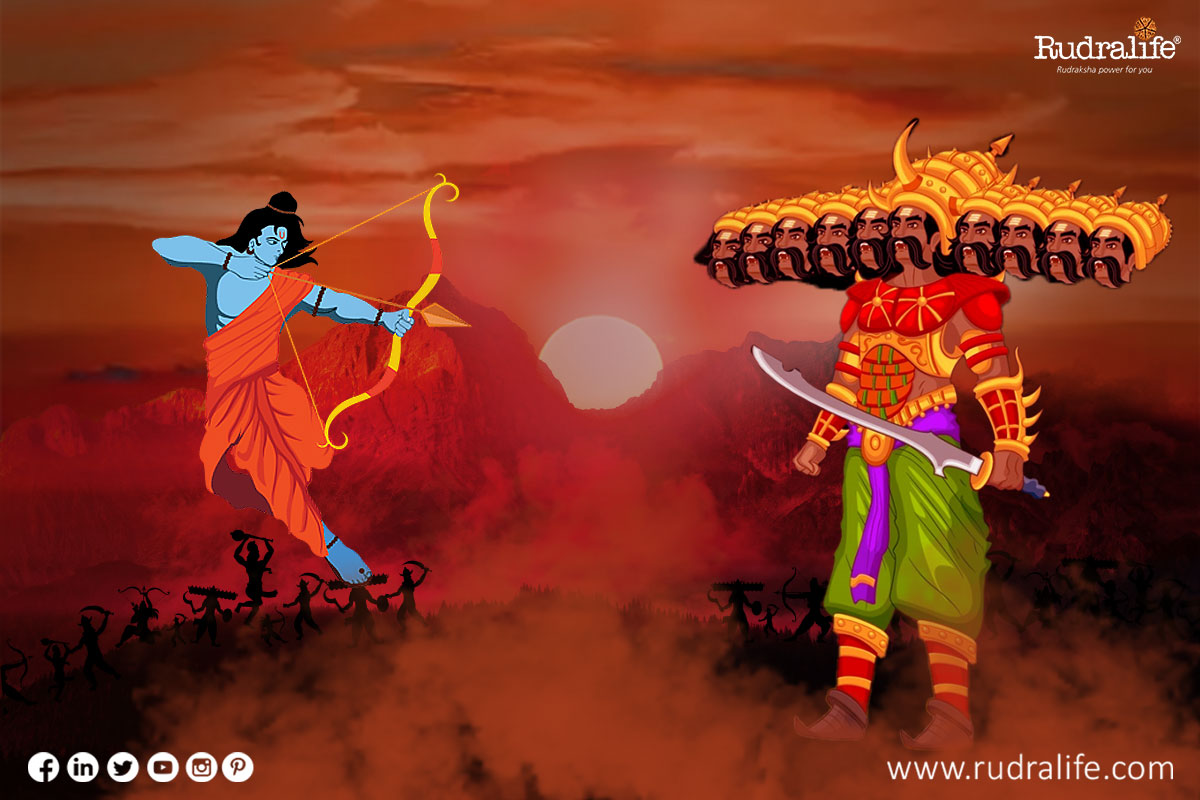

In [4]:
from IPython.display import Image, display
IMAGE_PATH = 'vision/dussera-b.jpg'  # adjust if needed
display(Image(filename=IMAGE_PATH))

def encode_image(path):
    with open(path, 'rb') as f:
        return base64.b64encode(f.read()).decode('utf-8')

IMAGE_B64 = encode_image(IMAGE_PATH)


## 5  Craft the prompt (text + image)

In [5]:
USER_TEXT = 'Tell me about this image'

def make_prompt(img_b64, text):
    return [{
        'role': 'user',
        'content': [
            {'type': 'text', 'text': text},
            {
                'type': 'image_url',
                'image_url': {
                    'url': f'data:image/jpeg;base64,{img_b64}'
                }
            }
        ]
    }]


## 6  Query each model & measure latency

In [8]:
for model in MODEL_LIST:
    print('\n' + '='*80)
    print('Model:', model)
    llm_client = OCIOpenAIHelper.get_client(
        model_name=model,
        config=cfg
        )

    start = time.time()
    response = llm_client.invoke(make_prompt(IMAGE_B64, USER_TEXT))
    print('Answer:', response.content)
    print('⏱ {:.2f}s'.format(time.time() - start))
print('\nDone!')



Model: meta.llama-4-scout-17b-16e-instruct
Answer: The image depicts a scene from the Hindu epic Ramayana, featuring Lord Rama and Ravana. The image is divided into two main sections: the left side shows Lord Rama in action, while the right side showcases Ravana.

*   **Lord Rama**
    *   Lord Rama is depicted on the left side of the image.
    *   He has blue skin and long black hair tied up in a bun.
    *   He wears an orange dhoti and holds a bow and arrow.
    *   His facial expression appears focused and determined.
*   **Ravana**
    *   Ravana is shown on the right side of the image.
    *   He has ten heads and two arms.
    *   He wears a red and gold armor set, along with green pants and red socks.
    *   He holds a sword in his hand.
    *   His facial expressions vary across his multiple heads, conveying a sense of anger and intensity.
*   **Background**
    *   The background features a mountainous landscape with a large sun or moon in the center.
    *   The sky is or

## 9. Play and Explore

* Tweak `USER_TEXT` and re-run a cell.
* Swap `IMAGE_PATH` with your own picture.
* Compare performance between models or endpoints.

## 🧑‍💻 Project Ideas for Practice

Below are some fun project prompts. Try one (or all) after you run a basic image through the models!

1. **Business Card → vCard**
   - Upload a photo of a business card.
   - Write a prompt such as: "Extract all the contact details from this business card and output as a vCard file."
   - Post-process the model's output to save/download the .vcf file.

2. **Agenda/Schedule → Calendar File**
   - Try an image of a handwritten or printed agenda.
   - Prompt: "Read and convert this agenda into an iCalendar (.ics) file."
   - Save and import to your calendar app!

3. **Driver's License → CRM/Create Record**
   - Upload an image of a driver's license (redact sensitive fields if needed).
   - Prompt: "Extract all key customer information for a CRM record."
   - Map the LLM's result into your database or spreadsheet.

If you see errors, double-check credentials or configurations. Refer to comments or docs for help.

---
**Happy building!**
